In [1]:
# mounting the drive to get the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# import the necessary packages
import numpy as np
import imutils
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [3]:
# Vidhan Saudha images
vidhanSaudha_path_link_1 = "/content/drive/MyDrive/Colab_Notebooks/IIITB_VR/Assignment_2/image_assignment_2/vidhanSaudha1.jpg"
vidhanSaudha_path_link_2 = "/content/drive/MyDrive/Colab_Notebooks/IIITB_VR/Assignment_2/image_assignment_2/vidhanSaudha3.jpg"
vidhanSaudha_path_link_3 = "/content/drive/MyDrive/Colab_Notebooks/IIITB_VR/Assignment_2/image_assignment_2/vidhanSaudha4.jpg"

# LOAD AN IMAGE USING 'IMREAD'
vidhanSaudha_img_1 = cv2.imread(vidhanSaudha_path_link_1)
vidhanSaudha_img_2 = cv2.imread(vidhanSaudha_path_link_2)
vidhanSaudha_img_3 = cv2.imread(vidhanSaudha_path_link_3)

# Cubbon Park images
cubbonPark_path_link_1 = "/content/drive/MyDrive/Colab_Notebooks/IIITB_VR/Assignment_2/image_assignment_2/cubbonPark1.jpg"
cubbonPark_path_link_2 = "/content/drive/MyDrive/Colab_Notebooks/IIITB_VR/Assignment_2/image_assignment_2/cubbonPark2.jpg"
cubbonPark_path_link_3 = "/content/drive/MyDrive/Colab_Notebooks/IIITB_VR/Assignment_2/image_assignment_2/cubbonPark3.jpg"

cubbonPark_img_1 = cv2.imread(cubbonPark_path_link_1)
cubbonPark_img_2 = cv2.imread(cubbonPark_path_link_2)
cubbonPark_img_3 = cv2.imread(cubbonPark_path_link_3)

# Hal Road images
halRoad_path_link_1 = "/content/drive/MyDrive/Colab_Notebooks/IIITB_VR/Assignment_2/image_assignment_2/halRoad1.jpg"
halRoad_path_link_2 = "/content/drive/MyDrive/Colab_Notebooks/IIITB_VR/Assignment_2/image_assignment_2/halRoad2.jpg"
halRoad_path_link_3 = "/content/drive/MyDrive/Colab_Notebooks/IIITB_VR/Assignment_2/image_assignment_2/halRoad3.jpg"

halRoad_img_1 = cv2.imread(halRoad_path_link_1)
halRoad_img_2 = cv2.imread(halRoad_path_link_2)
halRoad_img_3 = cv2.imread(halRoad_path_link_3)

# brigrade Road
brigadeRoad_path_link_1 = "/content/drive/MyDrive/Colab_Notebooks/IIITB_VR/Assignment_2/image_assignment_2/brigadeRoad1.jpg"
brigadeRoad_path_link_2 = "/content/drive/MyDrive/Colab_Notebooks/IIITB_VR/Assignment_2/image_assignment_2/brigadeRoad2.jpg"
brigadeRoad_path_link_3 = "/content/drive/MyDrive/Colab_Notebooks/IIITB_VR/Assignment_2/image_assignment_2/brigadeRoad3.jpg"

brigadeRoad_img_1 = cv2.imread(brigadeRoad_path_link_1)
brigadeRoad_img_2 = cv2.imread(brigadeRoad_path_link_2)
brigadeRoad_img_3 = cv2.imread(brigadeRoad_path_link_3)


In [44]:
def final_stitch(image_list):
    # initialize OpenCV's image stitcher object and then perform the image
    # stitching
    print("[INFO] stitching images...")
    stitcher = cv2.Stitcher_create()
    (status, stitched) = stitcher.stitch(image_list)

    crop = 1
    # if the status is '0', then OpenCV successfully performed image
    # stitching
    if status == 0:
        if crop > 0:
            # create a 10 pixel border surrounding the stitched image
            print("[INFO] cropping...")
            stitched = cv2.copyMakeBorder(stitched, 10, 10, 10, 10, cv2.BORDER_CONSTANT, (0, 0, 0))

            # (foreground) while all others remain 0 (background)
            gray = cv2.cvtColor(stitched, cv2.COLOR_BGR2GRAY)
            thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]

            # the stitched image
            cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            cnts = imutils.grab_contours(cnts)
            c = max(cnts, key=cv2.contourArea)

            mask = np.zeros(thresh.shape, dtype="uint8")
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(mask, (x, y), (x + w, y + h), 255, -1)

            minRect = mask.copy()
            sub = mask.copy()

            while cv2.countNonZero(sub) > 0:
                minRect = cv2.erode(minRect, None)
                sub = cv2.subtract(minRect, thresh)

            cnts = cv2.findContours(minRect.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            cnts = imutils.grab_contours(cnts)
            c = max(cnts, key=cv2.contourArea)
            (x, y, w, h) = cv2.boundingRect(c)
            # stitched image
            stitched = stitched[y:y + h, x:x + w]
    else:
        print("Image stitching failed ({})".format(status))

    return stitched

In [45]:
images_vidhanSaudha = []
images_vidhanSaudha.append(vidhanSaudha_img_1)
images_vidhanSaudha.append(vidhanSaudha_img_2)
images_vidhanSaudha.append(vidhanSaudha_img_3)

panaroma_vidhanSaudha = final_stitch(images_vidhanSaudha)

# display the output stitched image
cv2_imshow(panaroma_vidhanSaudha)

Output hidden; open in https://colab.research.google.com to view.

In [6]:
images_halRoad = []
images_halRoad.append(halRoad_img_1)
images_halRoad.append(halRoad_img_2)
images_halRoad.append(halRoad_img_3)

panaroma_halRoad = final_stitch(images_halRoad)

# display the output stitched image
cv2_imshow(panaroma_halRoad)

Output hidden; open in https://colab.research.google.com to view.

In [46]:
cv2.imwrite("/content/drive/MyDrive/Colab_Notebooks/IIITB_VR/Assignment_2/image_assignment_2/panaroma_vidhanSaudha.jpg",panaroma_vidhanSaudha)

True

In [47]:
cv2.imwrite("/content/drive/MyDrive/Colab_Notebooks/IIITB_VR/Assignment_2/image_assignment_2/panaroma_halRoad.jpg",panaroma_halRoad)

True

In [9]:
class Stitcher:
	def __init__(self):
		# determine if we are using OpenCV v3.X
		self.isv3 = imutils.is_cv3(or_better=True)

	def stitch(self, images, ratio=0.75, reprojThresh=5.0,showMatches=False):
		# unpack the images, then detect keypoints and extract
		# local invariant descriptors from them
		(imageB, imageA) = images
		(kpsA, featuresA) = self.detectAndDescribe(imageA)
		(kpsB, featuresB) = self.detectAndDescribe(imageB)
		# match features between the two images
		M = self.matchKeypoints(kpsA, kpsB,
			featuresA, featuresB, ratio, reprojThresh)
		# if the match is None, then there aren't enough matched
		# keypoints to create a panorama
		if M is None:
			return None

        # otherwise, apply a perspective warp to stitch the images
		# together
		(matches, H, status) = M
		result = cv2.warpPerspective(imageA, H, (imageA.shape[1] + imageB.shape[1], imageA.shape[0]))
		result[0:imageB.shape[0], 0:imageB.shape[1]] = imageB
		# check to see if the keypoint matches should be visualized
		if showMatches:
			vis = self.drawMatches(imageA, imageB, kpsA, kpsB, matches, status)
			# return a tuple of the stitched image and the
			# visualization
			return (result, vis)

		# return the stitched image
		return result

	def detectAndDescribe(self, image):
		# convert the image to grayscale
		gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
		# check to see if we are using OpenCV 3.X
		if self.isv3:
			# detect and extract features from the image
			descriptor = cv2.xfeatures2d.SIFT_create()
			(kps, features) = descriptor.detectAndCompute(image, None)
		# otherwise, we are using OpenCV 2.4.X
		else:
			# detect keypoints in the image
			detector = cv2.FeatureDetector_create("SIFT")
			kps = detector.detect(gray)
			# extract features from the image
			extractor = cv2.DescriptorExtractor_create("SIFT")
			(kps, features) = extractor.compute(gray, kps)
		# convert the keypoints from KeyPoint objects to NumPy
		# arrays
		kps = np.float32([kp.pt for kp in kps])
		# return a tuple of keypoints and features
		return (kps, features)

	def matchKeypoints(self, kpsA, kpsB, featuresA, featuresB,ratio, reprojThresh):
		# compute the raw matches and initialize the list of actual
		# matches
		matcher = cv2.DescriptorMatcher_create("BruteForce")
		rawMatches = matcher.knnMatch(featuresA, featuresB, 2)
		matches = []
		# loop over the raw matches
		for m in rawMatches:
			# ensure the distance is within a certain ratio of each
			# other (i.e. Lowe's ratio test)
			if len(m) == 2 and m[0].distance < m[1].distance * ratio:
				matches.append((m[0].trainIdx, m[0].queryIdx))

 		# computing a homography requires at least 4 matches
		if len(matches) > 4:
			# construct the two sets of points
			ptsA = np.float32([kpsA[i] for (_, i) in matches])
			ptsB = np.float32([kpsB[i] for (i, _) in matches])
			# compute the homography between the two sets of points
			(H, status) = cv2.findHomography(ptsA, ptsB, cv2.RANSAC, reprojThresh)
			# return the matches along with the homograpy matrix
			# and status of each matched point
			return (matches, H, status)
		# otherwise, no homograpy could be computed
		return None

	def drawMatches(self, imageA, imageB, kpsA, kpsB, matches, status):
		# initialize the output visualization image
		(hA, wA) = imageA.shape[:2]
		(hB, wB) = imageB.shape[:2]
		vis = np.zeros((max(hA, hB), wA + wB, 3), dtype="uint8")
		vis[0:hA, 0:wA] = imageA
		vis[0:hB, wA:] = imageB
		# loop over the matches
		for ((trainIdx, queryIdx), s) in zip(matches, status):
			# only process the match if the keypoint was successfully
			# matched
			if s == 1:
				# draw the match
				ptA = (int(kpsA[queryIdx][0]), int(kpsA[queryIdx][1]))
				ptB = (int(kpsB[trainIdx][0]) + wA, int(kpsB[trainIdx][1]))
				cv2.line(vis, ptA, ptB, (0, 255, 0), 1)
		# return the visualization
		return vis

In [10]:
def final_stitch(imageA, imageB):
    # initialize OpenCV's image stitcher object and then perform the image
    # stitching
    print("[INFO] stitching images...")
    stitcher = Stitcher()
    (result, vis) = stitcher.stitch([imageA, imageB], showMatches=True)
    stitched = result.copy()

    crop = 1
    # stitching
    if crop > 0:
        # (foreground) while all others remain 0 (background)
        gray = cv2.cvtColor(stitched, cv2.COLOR_BGR2GRAY)
        thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]

        # find the contours
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        for i in range(len(contours)):
            cnt = contours[i]
            x,y,w,h = cv2.boundingRect(cnt)

            # draw the bounding rectangle
            peri = 2*(w+h)
            if(peri>1000):
                stitched = stitched[y:y + h, x:x + w]
    else:
        return result, vis

    return stitched, vis

## Create Panaroma of Vidhan Saudha

In [11]:
cv2_imshow(vidhanSaudha_img_1)

Output hidden; open in https://colab.research.google.com to view.

In [12]:
cv2_imshow(vidhanSaudha_img_2)

Output hidden; open in https://colab.research.google.com to view.

[INFO] stitching images...


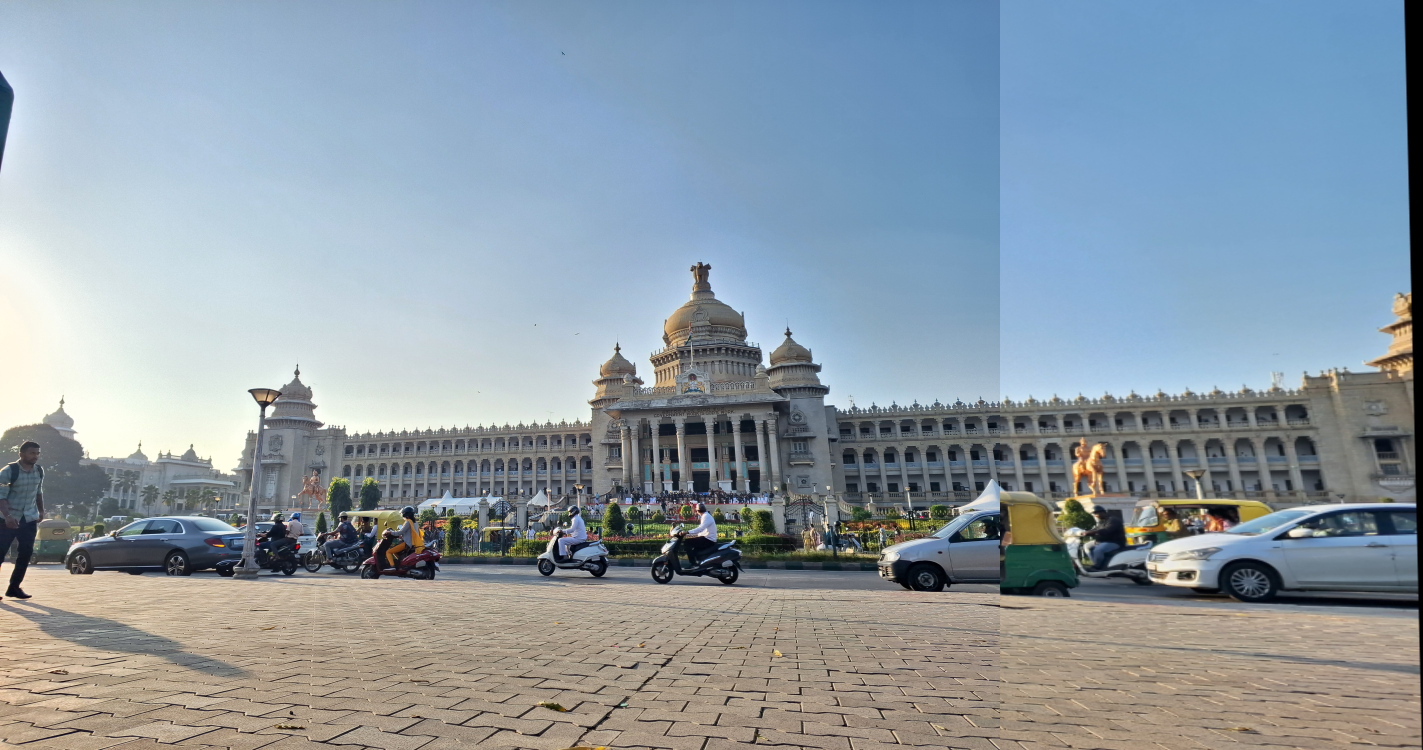

In [13]:
image_vidhanSaudha_1 = imutils.resize(vidhanSaudha_img_1, width=1000)
image_vidhanSaudha_2 = imutils.resize(vidhanSaudha_img_2, width=1000)

panaroma_vidhanSaudha_custom, show_matches_vidhanSaudha = final_stitch(image_vidhanSaudha_1,image_vidhanSaudha_2)
cv2_imshow(panaroma_vidhanSaudha_custom)

In [14]:
cv2_imshow(show_matches_vidhanSaudha)

Output hidden; open in https://colab.research.google.com to view.

## Create Panaroma of Infront of HAL

In [39]:
cv2_imshow(halRoad_img_2)

Output hidden; open in https://colab.research.google.com to view.

In [40]:
cv2_imshow(halRoad_img_3)

Output hidden; open in https://colab.research.google.com to view.

In [41]:
image_halRoad_1 = imutils.resize(halRoad_img_2, width=1000)
image_halRoad_2 = imutils.resize(halRoad_img_3, width=1000)

panaroma_halRoad_custom, show_matches_halRoad = final_stitch(image_halRoad_1,image_halRoad_2)
cv2_imshow(panaroma_halRoad_custom)

Output hidden; open in https://colab.research.google.com to view.

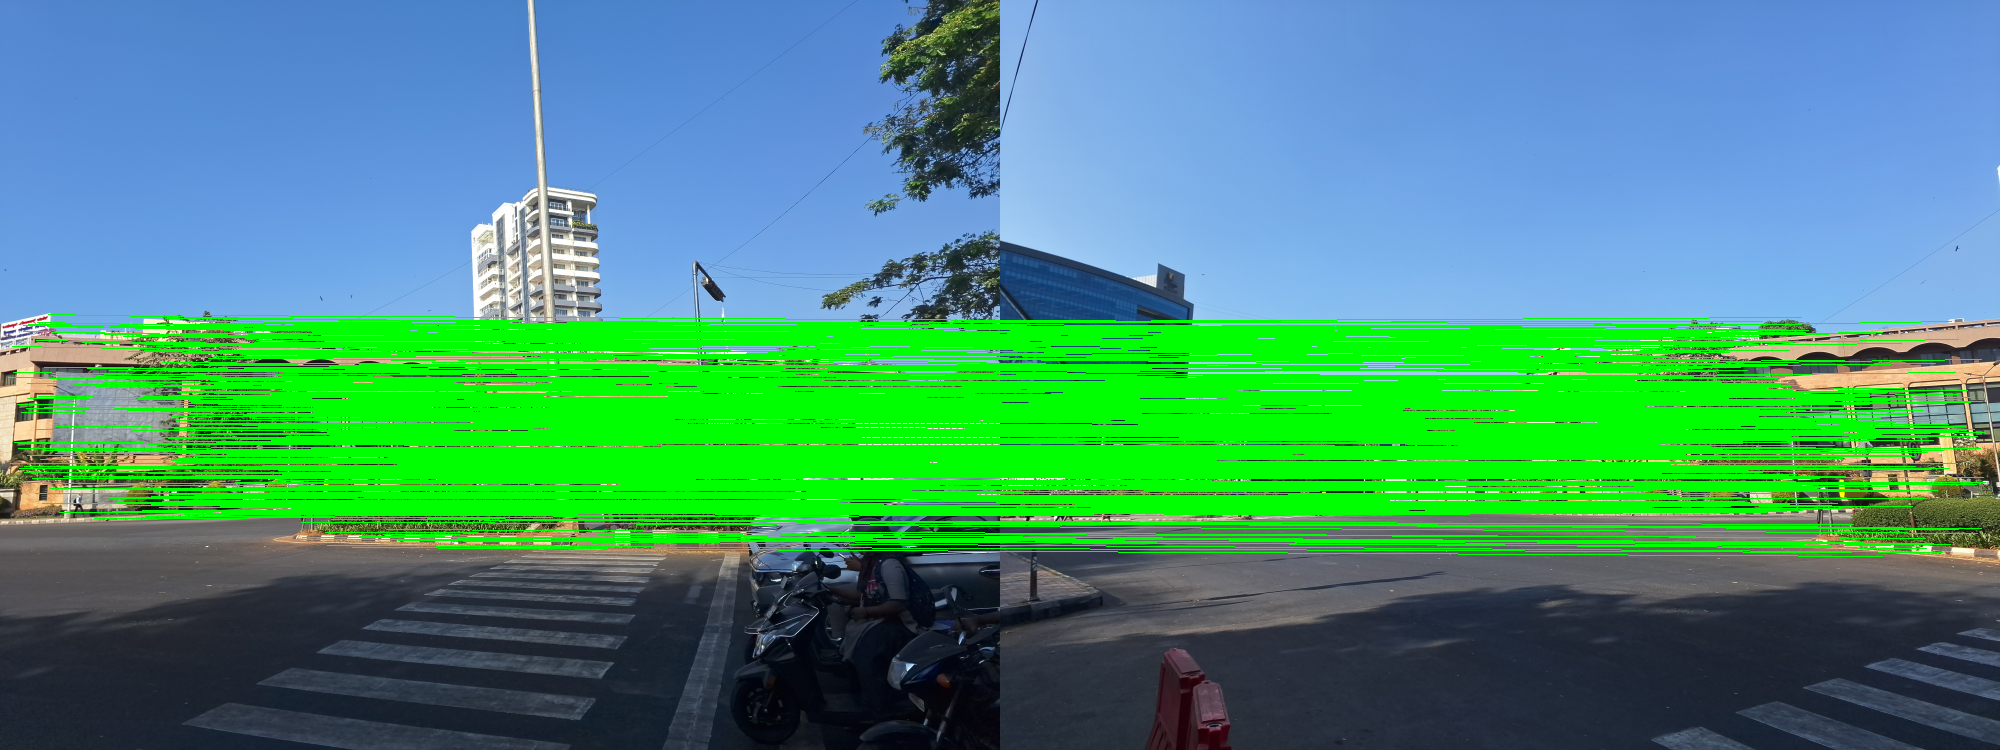

In [42]:
cv2_imshow(show_matches_halRoad)

## Create Panarome of Brigade Road

In [19]:
cv2_imshow(brigadeRoad_img_1)

Output hidden; open in https://colab.research.google.com to view.

In [20]:
cv2_imshow(brigadeRoad_img_2)

Output hidden; open in https://colab.research.google.com to view.

In [21]:
image_brigadeRoad_1 = imutils.resize(brigadeRoad_img_1, width=1000)
image_brigadeRoad_2 = imutils.resize(brigadeRoad_img_2, width=1000)

panaroma_brigadeRoad_custom, show_matches_brigadeRoad = final_stitch(image_brigadeRoad_1,image_brigadeRoad_2)
cv2_imshow(panaroma_brigadeRoad_custom)

Output hidden; open in https://colab.research.google.com to view.

In [22]:
cv2_imshow(show_matches_brigadeRoad)

Output hidden; open in https://colab.research.google.com to view.

## Create Parnaroma of Cubbon Park  

In [23]:
cv2_imshow(cubbonPark_img_1)

Output hidden; open in https://colab.research.google.com to view.

In [24]:
cv2_imshow(cubbonPark_img_2)

Output hidden; open in https://colab.research.google.com to view.

In [25]:
image_cubbonPark_1 = imutils.resize(cubbonPark_img_1, width=1000)
image_cubbonPark_2 = imutils.resize(cubbonPark_img_2, width=1000)

panaroma_cubbonPark_custom, show_matches_cubbonPark = final_stitch(image_cubbonPark_1,image_cubbonPark_2)
cv2_imshow(panaroma_cubbonPark_custom)

Output hidden; open in https://colab.research.google.com to view.

In [26]:
cv2_imshow(show_matches_cubbonPark)

Output hidden; open in https://colab.research.google.com to view.

In [48]:
cv2.imwrite("/content/drive/MyDrive/Colab_Notebooks/IIITB_VR/Assignment_2/image_assignment_2/panaroma_vidhanSaudha_custom.jpg",panaroma_vidhanSaudha_custom)

True

In [49]:
cv2.imwrite("/content/drive/MyDrive/Colab_Notebooks/IIITB_VR/Assignment_2/image_assignment_2/show_matches_vidhanSaudha.jpg",show_matches_vidhanSaudha)

True

In [50]:
cv2.imwrite("/content/drive/MyDrive/Colab_Notebooks/IIITB_VR/Assignment_2/image_assignment_2/panaroma_halRoad_custom.jpg",panaroma_halRoad_custom)

True

In [51]:
cv2.imwrite("/content/drive/MyDrive/Colab_Notebooks/IIITB_VR/Assignment_2/image_assignment_2/show_matches_halRoad.jpg",show_matches_halRoad)

True

In [52]:
cv2.imwrite("/content/drive/MyDrive/Colab_Notebooks/IIITB_VR/Assignment_2/image_assignment_2/panaroma_brigadeRoad_custom.jpg",panaroma_brigadeRoad_custom)

True

In [53]:
cv2.imwrite("/content/drive/MyDrive/Colab_Notebooks/IIITB_VR/Assignment_2/image_assignment_2/show_matches_brigadeRoad.jpg",show_matches_brigadeRoad)

True

In [54]:
cv2.imwrite("/content/drive/MyDrive/Colab_Notebooks/IIITB_VR/Assignment_2/image_assignment_2/panaroma_cubbonPark_custom.jpg",panaroma_cubbonPark_custom)

True

In [55]:
cv2.imwrite("/content/drive/MyDrive/Colab_Notebooks/IIITB_VR/Assignment_2/image_assignment_2/show_matches_cubbonPark.jpg",show_matches_cubbonPark)

True